## Import statements

In [1]:
import pandas as pd
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt

## Load file-data

In [2]:
csv_file = "../../files/nestle.csv"  # Ersetzen Sie durch den Pfad zu Ihrer CSV-Datei
df = pd.read_csv(csv_file)

## View data

In [3]:
df.head(10)

,ID,Text,Is_Activism,Category,Post_Id,Like_Count
0,1,"Sounds good, millions of trees sounds a lot, k...",True,Environmental,CvmHxh_sTa9,2
1,2,I live in Brazil. I want Work for Nestlé.,False,Environmental,CvmHxh_sTa9,2
2,3,Sjukt bra!,False,Environmental,CvmHxh_sTa9,1
3,4,😍,False,Environmental,CvmHxh_sTa9,1
4,5,and the water?,False,Environmental,CvmHxh_sTa9,2
5,6,😍,False,Environmental,CvmHxh_sTa9,3
6,7,👏,False,Environmental,CvmHxh_sTa9,2
7,8,we dont have water for you,False,Environmental,CvmHxh_sTa9,6
8,9,Тъпаци,False,Environmental,CvmHxh_sTa9,2
9,10,👏,False,Environmental,CvmHxh_sTa9,1


## Load locally saved model

In [4]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig

MODEL_PATH = "cardiffnlp/twitter-xlm-roberta-base-sentiment" 

tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
config = AutoConfig.from_pretrained(MODEL_PATH)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH)


2023-09-22 12:04:55.310730: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Process text

In [5]:
# Preprocess text (username and link placeholders)
def preprocess(text):

    # emojis entfernen
    #text = ersetze_emojis(text)

    # lemmatizer = WordNetLemmatizer()
    # words = text.split()
    # lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # text = ' '.join(lemmatized_words)


    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

## Predict columns

In [6]:
# Leere Listen zum Speichern der vorhergesagten Sentiments und der tatsächlichen Labels
predicted_sentiments = []

count = 0
# Durchlaufen Sie jeden Eintrag im DataFrame und wenden Sie das Modell an
for index, row in df.iterrows():
    text = row['Text']
    text = preprocess(text)  # Stellen Sie sicher, dass Sie Ihre Preprocessing-Funktion hier verwenden
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    softmax_scores = softmax(scores)

    # Extrahieren Sie das vorhergesagte Sentiment
    predicted_label_id = np.argmax(softmax_scores)
    #predicted_sentiment = model.config.id2label[predicted_label_id]

    # Speichern Sie das vorhergesagte Sentiment und das tatsächliche Label
    predicted_sentiments.append(predicted_label_id)

# Fügen Sie die vorhergesagten Sentiments und die tatsächlichen Labels als neue Spalten zum DataFrame hinzu
df['predicted_sentiment'] = predicted_sentiments

In [7]:
df.head(50)

,ID,Text,Is_Activism,Category,Post_Id,Like_Count,predicted_sentiment
0,1,"Sounds good, millions of trees sounds a lot, k...",True,Environmental,CvmHxh_sTa9,2,2
1,2,I live in Brazil. I want Work for Nestlé.,False,Environmental,CvmHxh_sTa9,2,1
2,3,Sjukt bra!,False,Environmental,CvmHxh_sTa9,1,2
3,4,😍,False,Environmental,CvmHxh_sTa9,1,2
4,5,and the water?,False,Environmental,CvmHxh_sTa9,2,1
5,6,😍,False,Environmental,CvmHxh_sTa9,3,2
6,7,👏,False,Environmental,CvmHxh_sTa9,2,2
7,8,we dont have water for you,False,Environmental,CvmHxh_sTa9,6,0
8,9,Тъпаци,False,Environmental,CvmHxh_sTa9,2,1
9,10,👏,False,Environmental,CvmHxh_sTa9,1,2


## Return statistics

In [8]:
# Annahme: Sie haben bereits Ihr DataFrame "df" wie in Ihrer vorherigen Frage definiert.

# Erstellen Sie eine neue Spalte "Sentiment_Label" basierend auf "predicted_sentiment".
sentiment_labels = {0: 'Negativ', 1: 'Neutral', 2: 'Positiv'}
df['Sentiment_Label'] = df['predicted_sentiment'].map(sentiment_labels)

# Gruppieren Sie nach "Category" und "Sentiment_Label" und aggregieren Sie die Anzahl der Einträge.
result = df.groupby(['Category', 'Sentiment_Label'])['ID'].count().unstack(fill_value=0).reset_index()

# Fehlende Kategorien hinzufügen und Reihen sortieren.
categories = df['Category'].unique()
sentiments = ['Negativ', 'Neutral', 'Positiv']
result = result[['Category'] + sentiments]

# Wenn es keine Einträge für eine bestimmte Kategorie gibt, fügen Sie Nullen hinzu.
for category in categories:
    if category not in result['Category'].values:
        result = result.append({'Category': category}, ignore_index=True)
        result = result.fillna(0)

# Ändern Sie den Spaltennamen, um besser zu beschreiben, was sie enthalten.
result.columns = ['Kategorie'] + sentiments




In [9]:
result

,Kategorie,Negativ,Neutral,Positiv
0,Environmental,4,6,6
1,None,14,16,78
2,social,16,18,29
3,workplace,9,2,4


In [11]:

# Erstellen Sie eine neue Spalte "Sentiment_Label" basierend auf "predicted_sentiment".
sentiment_labels = {0: 'Negativ', 1: 'Neutral', 2: 'Positiv'}
df['Sentiment_Label'] = df['predicted_sentiment'].map(sentiment_labels)

# Gruppieren Sie nach "Category" und "Sentiment_Label" und aggregieren Sie die Anzahl der Einträge und die Summe der Like-Counts.
result = df.groupby(['Category', 'Sentiment_Label']).agg({'ID': 'count', 'Like_Count': 'sum'}).unstack(fill_value=0).reset_index()

# Fehlende Kategorien hinzufügen und Reihen sortieren.
categories = df['Category'].unique()
sentiments = ['Negativ', 'Neutral', 'Positiv']
result = result.fillna(0)

# Spaltennamen anpassen.
result.columns = ['Category'] + [(sentiment, 'Anzahl Kommentare') for sentiment in sentiments] + [(sentiment, 'Gesamter Like Count') for sentiment in sentiments]

# Ergebnis anzeigen
print(result)

        Category  (Negativ, Anzahl Kommentare)  (Neutral, Anzahl Kommentare)  \
0  Environmental                             4                             6   
1           None                            14                            16   
2         social                            16                            18   
3      workplace                             9                             2   

   (Positiv, Anzahl Kommentare)  (Negativ, Gesamter Like Count)  \
0                             6                              10   
1                            78                              23   
2                            29                             130   
3                             4                              21   

   (Neutral, Gesamter Like Count)  (Positiv, Gesamter Like Count)  
0                               8                              10  
1                              16                             123  
2                              27                          

In [12]:
result

,Category,"(Negativ, Anzahl Kommentare)","(Neutral, Anzahl Kommentare)","(Positiv, Anzahl Kommentare)","(Negativ, Gesamter Like Count)","(Neutral, Gesamter Like Count)","(Positiv, Gesamter Like Count)"
0,Environmental,4,6,6,10,8,10
1,None,14,16,78,23,16,123
2,social,16,18,29,130,27,53
3,workplace,9,2,4,21,5,7


In [13]:
# DataFrame in ein Python-Dictionary umwandeln
dictionary_data = result.to_dict(orient='split')

# Das Python-Dictionary enthält nun Ihre Daten
print(dictionary_data)

{'index': [0, 1, 2, 3], 'columns': ['Category', ('Negativ', 'Anzahl Kommentare'), ('Neutral', 'Anzahl Kommentare'), ('Positiv', 'Anzahl Kommentare'), ('Negativ', 'Gesamter Like Count'), ('Neutral', 'Gesamter Like Count'), ('Positiv', 'Gesamter Like Count')], 'data': [['Environmental', 4, 6, 6, 10, 8, 10], ['None', 14, 16, 78, 23, 16, 123], ['social', 16, 18, 29, 130, 27, 53], ['workplace', 9, 2, 4, 21, 5, 7]]}


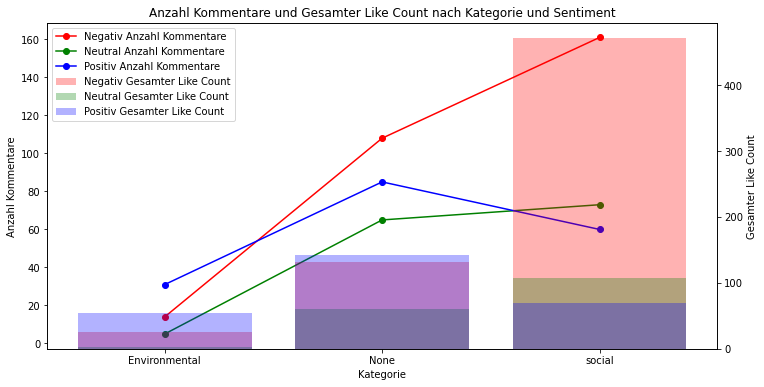

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame aus dem Dictionary erstellen
df = pd.DataFrame({'Category': ['Environmental', 'None', 'social'],
                   ('Negativ', 'Anzahl Kommentare'): [14, 108, 161],
                   ('Neutral', 'Anzahl Kommentare'): [5, 65, 73],
                   ('Positiv', 'Anzahl Kommentare'): [31, 85, 60],
                   ('Negativ', 'Gesamter Like Count'): [26, 132, 471],
                   ('Neutral', 'Gesamter Like Count'): [2, 60, 108],
                   ('Positiv', 'Gesamter Like Count'): [54, 142, 69],})

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()  # Zweite Y-Achse erstellen

# Farben für jede Sentiment-Kombination definieren
colors = ['r', 'g', 'b']
sentiments = ['Negativ', 'Neutral', 'Positiv']

for i, sentiment in enumerate(sentiments):
    # Datenreihen zum Plotten auswählen
    comment_counts = df[(sentiment, 'Anzahl Kommentare')]
    like_counts = df[(sentiment, 'Gesamter Like Count')]

    # Linien für 'Anzahl Kommentare' zeichnen
    ax1.plot(df['Category'], comment_counts, marker='o', color=colors[i], label=f'{sentiment} Anzahl Kommentare')

    # Balkendiagramm für 'Gesamter Like Count' zeichnen
    ax2.bar(df['Category'], like_counts, alpha=0.3, color=colors[i], label=f'{sentiment} Gesamter Like Count')

# Beschriftungen, Titel und Legende setzen
ax1.set_xlabel('Kategorie')
ax1.set_ylabel('Anzahl Kommentare', color='black')
ax2.set_ylabel('Gesamter Like Count', color='black')
plt.title('Anzahl Kommentare und Gesamter Like Count nach Kategorie und Sentiment')

# Legende kombinieren
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

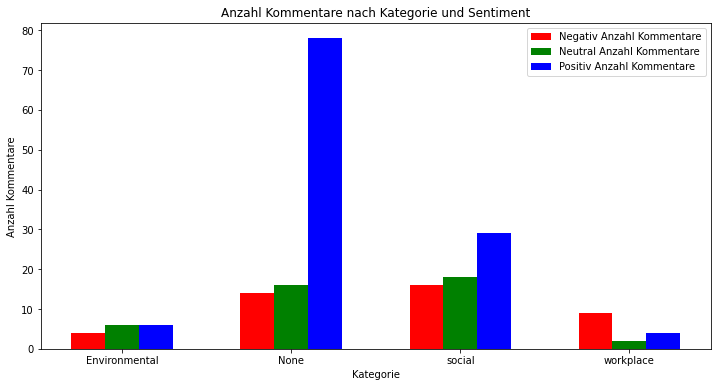

In [15]:
# DataFrame aus dem Dictionary erstellen
df = pd.DataFrame(dictionary_data['data'], columns=dictionary_data['columns'])

fig, ax = plt.subplots(figsize=(12, 6))

# Breite der Balken definieren
bar_width = 0.2
bar_positions = np.arange(len(df['Category']))

# Farben für jede Sentiment-Kombination definieren
colors = ['r', 'g', 'b']
sentiments = ['Negativ', 'Neutral', 'Positiv']

for i, sentiment in enumerate(sentiments):
    # Datenreihe zum Plotten auswählen
    comment_counts = df[(sentiment, 'Anzahl Kommentare')]

    # Balkendiagramm für 'Anzahl Kommentare' zeichnen
    ax.bar(bar_positions + i * bar_width, comment_counts,  width=bar_width, label=f'{sentiment} Anzahl Kommentare', color=colors[i])

# Beschriftungen, Titel und Legende setzen
ax.set_xlabel('Kategorie')
ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(df['Category'])
ax.set_ylabel('Anzahl Kommentare', color='black')
plt.title('Anzahl Kommentare nach Kategorie und Sentiment')
ax.legend(loc='upper right')

plt.show()

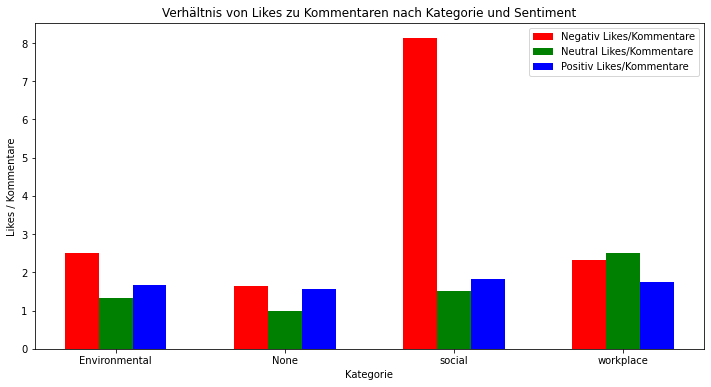

In [16]:
# DataFrame aus dem Dictionary erstellen
df = pd.DataFrame(dictionary_data['data'], columns=dictionary_data['columns'])

fig, ax = plt.subplots(figsize=(12, 6))

# Breite der Balken definieren
bar_width = 0.2
bar_positions = np.arange(len(df['Category']))

# Farben für jede Sentiment-Kombination definieren
colors = ['r', 'g', 'b']
sentiments = ['Negativ', 'Neutral', 'Positiv']

for i, sentiment in enumerate(sentiments):
    # Datenreihen zur Berechnung des Verhältnisses auswählen
    comment_counts = df[(sentiment, 'Anzahl Kommentare')]
    like_counts = df[(sentiment, 'Gesamter Like Count')]

    # Verhältnis berechnen und plotten
    ratio = like_counts / comment_counts
    ax.bar(bar_positions + i * bar_width, ratio,  width=bar_width, label=f'{sentiment} Likes/Kommentare', color=colors[i])

# Beschriftungen, Titel und Legende setzen
ax.set_xlabel('Kategorie')
ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(df['Category'])
ax.set_ylabel('Likes / Kommentare', color='black')
plt.title('Verhältnis von Likes zu Kommentaren nach Kategorie und Sentiment')
ax.legend(loc='upper right')

plt.show()

In [39]:
df

,Category,"(Negativ, Anzahl Kommentare)","(Neutral, Anzahl Kommentare)","(Positiv, Anzahl Kommentare)","(Negativ, Gesamter Like Count)","(Neutral, Gesamter Like Count)","(Positiv, Gesamter Like Count)"
0,Environmental,14,5,31,26,2,54
1,None,108,65,85,132,60,142
2,social,161,73,60,471,108,69
